<a href="https://colab.research.google.com/github/kanyijohn/Deep-Learning-ML-models/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
import numpy as np

# Load the IMDB dataset
imdb = tf.keras.datasets.imdb
(vocab_size, max_length) = (10000, 100)  # 10,000 words, max 100 words per review

# Load data and split into training and testing sets
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to make them uniform
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Build the RNN Model with LSTM
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),  # Word embeddings (word to vector)
    Bidirectional(LSTM(64, return_sequences=True)),  # First LSTM layer (returns sequences for stacking) # Moved return_sequences to LSTM
    Bidirectional(LSTM(32)),  # Second LSTM layer (outputs final sequence)
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.6890 - loss: 0.5662 - val_accuracy: 0.8129 - val_loss: 0.4032
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.8839 - loss: 0.2956 - val_accuracy: 0.8140 - val_loss: 0.4232
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9273 - loss: 0.1949 - val_accuracy: 0.7988 - val_loss: 0.5791
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9632 - loss: 0.1088 - val_accuracy: 0.7910 - val_loss: 0.6873
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9784 - loss: 0.0646 - val_accuracy: 0.7839 - val_loss: 0.8474
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9845 - loss: 0.0481 - val_accuracy: 0.7790 - val_loss: 1.2197
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.9907 - loss: 0.0298 - val_accuracy: 0.7671 - val_loss: 1.0303
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9922 - loss: 0.0249 - val_accurac

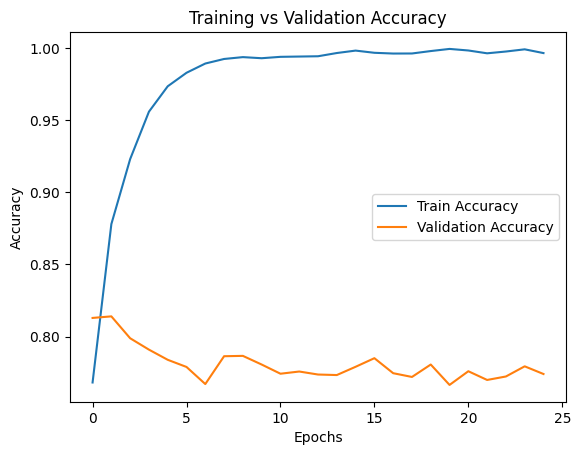

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7749 - loss: 1.8907
Test Accuracy: 0.7741


In [5]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


In [8]:
import tensorflow as tf
# Import the 'keras' module
from tensorflow import keras

word_index = imdb.get_word_index()

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return pad_sequences([tokens], maxlen=max_length, padding='post', truncating='post')[0] # added pad_sequences
                                                                                           # and other arguments

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)

[ 12  17  13  40 477  35 477   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [9]:
# while were at it lets make a decode function

reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]

print(decode_integers(encoded))

that movie was just amazing so amazing


In [15]:
# now time to make a prediction

def predict(text):
  encoded_text = encode_text(text)
  # Changed the shape of pred to (1, max_length) to match the encoded text shape
  pred = np.zeros((1, max_length))
  pred[0] = encoded_text
  result = model.predict(pred)
  print(result[0])

negative_review = "That movie was awful! really hated it and wouldn't watch it again because it wasn't good"
predict(negative_review)

negative_review = "that movie was really good. I loved it and would want watch it again. Was one of the best things I've ever watched"
predict(negative_review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[0.99835616]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.86446244]
